In [132]:
from nex.colors import cols
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import matplotlib as mpl
import pickle

In [133]:
import time
import IPython.display as IPd
from svgutils.compose import *

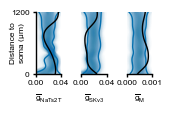

In [134]:
color = cols["jaxley"]

with open("../results/03_voltage_imaging/processed_posterior_apical.pkl", "rb") as handle:
    processed_posterior = pickle.load(handle)

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, axs = plt.subplots(1, 3, figsize=(1.5, 0.8))
    names = [r"$\overline{g}_{NaTs2T}$", r"$\overline{g}_{SKv3}$", r"$\overline{g}_M$"]
    keys = list(processed_posterior.keys())
    bounds = processed_posterior["bounds"]
    gt_profiles_apical = processed_posterior["gt_profiles_apical"]
    
    i=0
    for key in keys:
        if key == "bounds" or key == "gt_profiles_apical":
            continue
        axs[i].set_xlabel(names[i])
    
        data = processed_posterior[key]
        xaxis = data["x_axis"]
        yaxis = data["y_axis"]
        q = data["quantiles"]
        idx_005 = data["idx_005"]
        idx_095 = data["idx_095"]
    
        if i == 0:
            axs[i].set_ylabel("Distance to\nsoma " + r"($\mu$m)", labelpad=-12)
            axs[i].set_yticks([0, 1200])
        else:
            axs[i].spines['left'].set_visible(False)
            axs[i].yaxis.set_visible(False)

        for j in range(100):
            color_index = (1- jnp.abs(i - 50)/50)**0.1
            axs[i].plot(q[j],xaxis, color=color, alpha=0.02, lw=5)
        
        axs[i].plot(q[idx_005],xaxis,  color=color, lw=1)
        axs[i].plot(q[idx_095],xaxis,  color=color, lw=1)
        evals = np.linspace(0, 1200, 100)
        axs[i].plot(gt_profiles_apical[key] * bounds[key][1],evals, color="k")
        axs[i].set_xlim(bounds[key])
        axs[i].set_xticks(bounds[key])
        axs[i].set_ylim([0,1200])
        i+=1
    plt.subplots_adjust(wspace=0.8)
    plt.savefig("../svg/supp_hmc_panel_a.svg", bbox_inches="tight")
    plt.show()

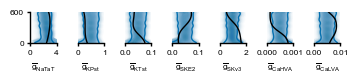

In [135]:
with open("../results/03_voltage_imaging/processed_posterior_axonal.pkl", "rb") as handle:
    processed_posterior = pickle.load(handle)
    
with mpl.rc_context(fname="../../../.matplotlibrc"):
    keys = list(processed_posterior.keys())
    fig, axs = plt.subplots(1, len(keys)-2, figsize=(4, 0.4))
    names = [
        r"$\overline{g}_{NaTaT}$",
        r"$\overline{g}_{KPst}$",
        r"$\overline{g}_{KTst}$",
        r"$\overline{g}_{SKE2}$",
        r"$\overline{g}_{SKv3}$",
        r"$\overline{g}_{CaHVA}$",
        r"$\overline{g}_{CaLVA}$",
    ]
    # names = [k.split("_")[1] for k in keys[:-2]]
    
    bounds = processed_posterior["bounds"]
    gt_profiles_apical = processed_posterior["gt_profiles_axonal"]
    
    # Hide y-axis ticks on the left
    
    for i in range(len(keys)-2):
        key = keys[i]
        axs[i].set_xlabel(names[i])
        # print(names[i])
                
        data = processed_posterior[key]
        xaxis = data["x_axis"]
        yaxis = data["y_axis"]
        q = data["quantiles"]
        idx_005 = data["idx_005"]
        idx_095 = data["idx_095"]
    
        if i == 0:
            axs[i].set_yticks([0, 600])
        else:
            axs[i].spines['left'].set_visible(False)
            axs[i].yaxis.set_visible(False)

        axs[i].set_ylim([0, 600])
    
        for j in range(100):
            color_index = (1- jnp.abs(i - 50)/50)**0.1
            axs[i].plot(q[j],xaxis, color=color, alpha=0.02, lw=5)
        
        axs[i].plot(q[idx_005],xaxis,  color=color, lw=1)
        axs[i].plot(q[idx_095],xaxis,  color=color, lw=1)
        evals = np.linspace(0, 1200, 100)
        axs[i].plot(gt_profiles_apical[key] * bounds[key][1], evals, color="k")
        axs[i].set_xlim(bounds[key])
        axs[i].set_xticks(bounds[key])
        axs[i].set_ylim([0,600])
    plt.subplots_adjust(wspace=0.8)
    plt.savefig("../svg/supp_hmc_panel_b.svg", bbox_inches="tight")
    plt.show()

# Assemble figure

In [138]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "14.0cm",
    "2.7cm",
    Panel(
        SVG("../svg/supp_hmc_panel_a.svg").scale(svg_scale).move(10, 0),
        Text("Apical", 86, 5.0, **kwargs_text_normal),
    ).move(-15, 2),
    Panel(
        SVG("../svg/supp_hmc_panel_b.svg").scale(svg_scale).move(10, 0),
        Text("Axonal", 173, -25.0, **kwargs_text_normal),
    ).move(160, 32),
)

!mkdir -p fig
f.save("../fig/fig3_supp_hmc.svg")
svg("../fig/fig3_supp_hmc.svg")